# Import Libraries and Tools

In [60]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # This is to adjust the configuration of the plots we will create


In [62]:
# Read in the data

df = pd.read_csv(r"C:\Users\Takeo\OneDrive\Data Analysis Portfolio\Project Portfolio\Movie Practice\movies.csv")

# Data Cleaning

In [64]:
# Take a glimpse of the data
 # Summary of the database

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [66]:
# Checking missing data (There are several ways to check missing data)

# First methods:

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [68]:
# Second method:

for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")

name
False    7668
Name: count, dtype: int64 

rating
False    7591
True       77
Name: count, dtype: int64 

genre
False    7668
Name: count, dtype: int64 

year
False    7668
Name: count, dtype: int64 

released
False    7666
True        2
Name: count, dtype: int64 

score
False    7665
True        3
Name: count, dtype: int64 

votes
False    7665
True        3
Name: count, dtype: int64 

director
False    7668
Name: count, dtype: int64 

writer
False    7665
True        3
Name: count, dtype: int64 

star
False    7667
True        1
Name: count, dtype: int64 

country
False    7665
True        3
Name: count, dtype: int64 

budget
False    5497
True     2171
Name: count, dtype: int64 

gross
False    7479
True      189
Name: count, dtype: int64 

company
False    7651
True       17
Name: count, dtype: int64 

runtime
False    7664
True        4
Name: count, dtype: int64 



In [70]:
# Third methods:

df_null = df.isnull().sum()
print(df_null)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [72]:
# There are several ways to check the missing data (NULL) as long you understand what your objective before proceeding to the next steps. 

In [74]:
# Checking data type of your database

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [68]:
# Change the data type of columns
    # ISSUE:
        #IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [76]:
    # FIX:
        # This code handles non-numeric values gracefully before converting to integers.

df['budget'] = pd.to_numeric(df['budget'], errors = 'coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors = 'coerce').fillna(0).astype(int)

In [78]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [18]:
# Create correct Year column

df['monthcorrect'] = df['released'].astype(str).str.split().str[:2]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,monthcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"[June, 13,]"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"[July, 2,]"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"[June, 20,]"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"[July, 2,]"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"[July, 25,]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,"[October, 23,]"
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,"[February, 7,]"
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,"[April, 27,]"
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,"[October, 1,]"


In [80]:
# Sorting the 'gross' columns

df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [30]:
# Unlock the limit rows display

pd.set_option('display.max_rows', 1000)

In [103]:
# Drop any duplicates

df.drop_duplicates()

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

# Analyze the Data

In [111]:
# Budget high correlation
# Company high correlation

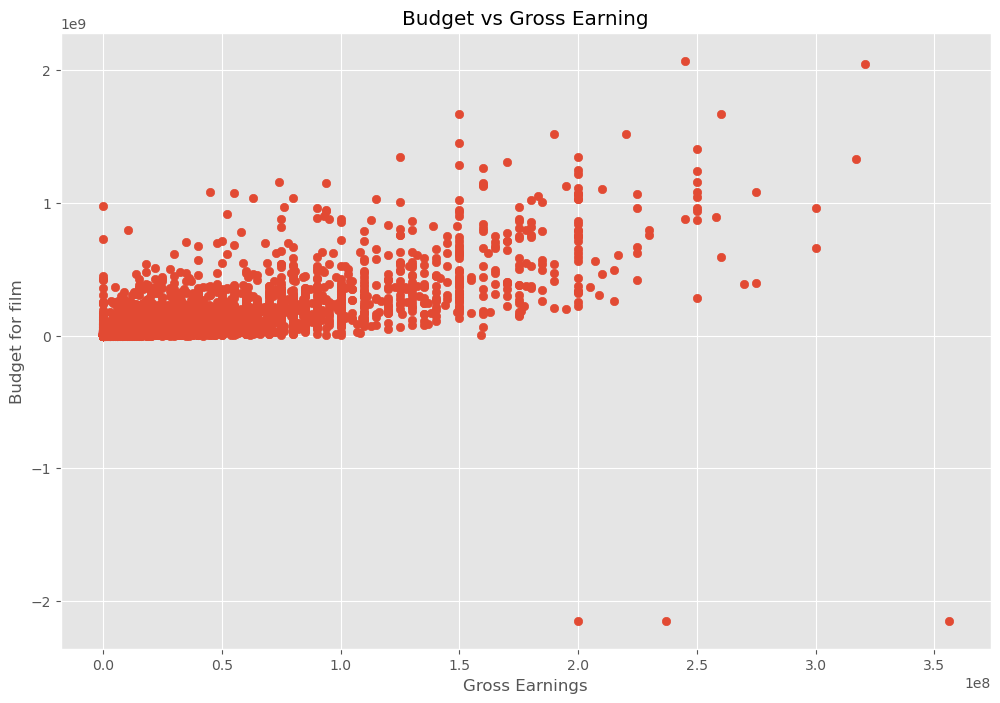

In [24]:
# Scatter plot with budget VS gross
    # ISSUE: There are some negative numbers in the gross column

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

plt.show()

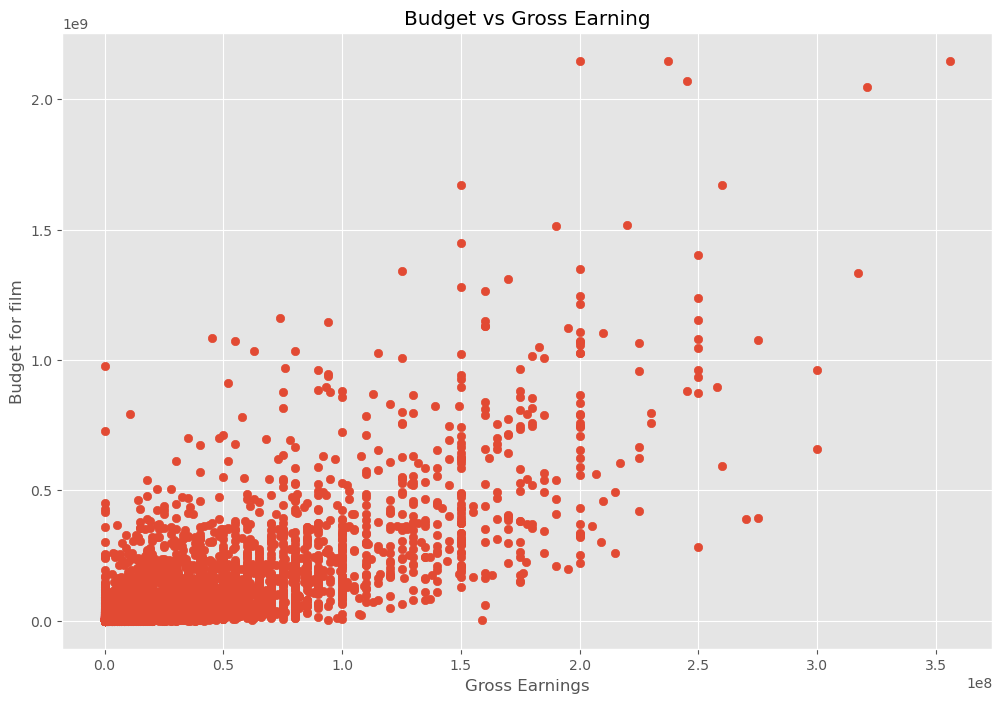

In [26]:
    # FIXED:
        # Apply conditional function to the column containing negative numbers
        
df['gross'] = df['gross'].apply(lambda x: abs(x) if x < 0 else x)

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')


plt.show()

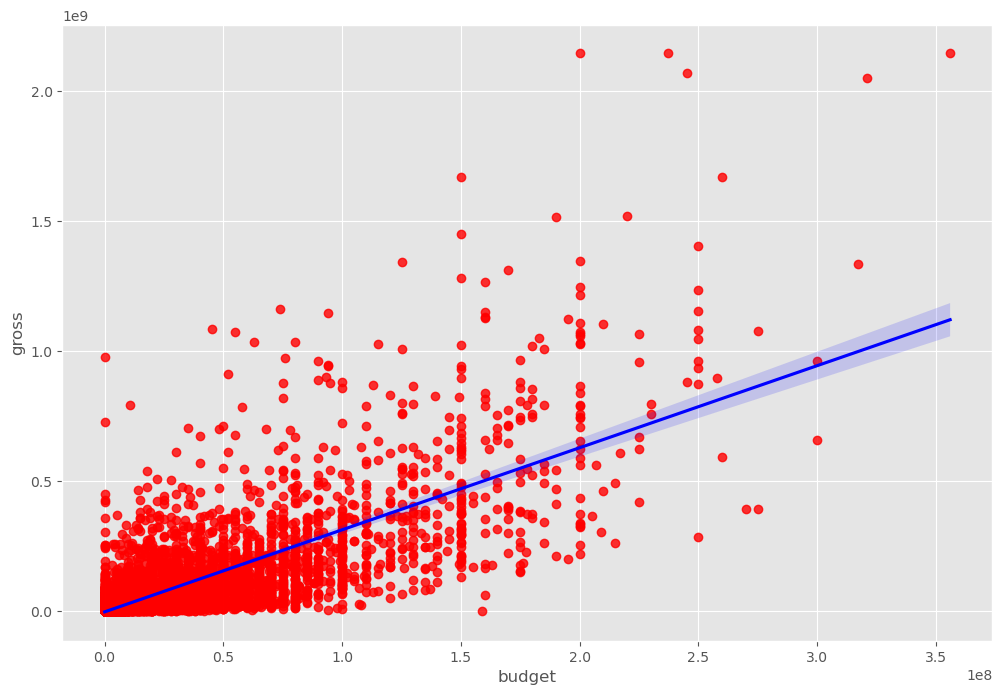

In [36]:
# Plot budget VS gross using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'});

In [38]:
# Looking at correlation
    # Tips:
        # There are several methods of correlation (pearson, kendall, spearman. Pearson is by default)
        # Summary differences method (type of relationship):
            # Pearson: Linear
            # Kendall: Ordinal, monotonic
            # Spearman: Monotonic (linear or nonlinear)
        # Summary differences method (Data Type):
            # Pearson: Continuous (Interval/Ratio)
            # Kendall: Ordinal, small dataset
            # Spearman: Ordinal or Continuous
    # ISSUE:
        #ValueError: could not convert string to float: 'Star Wars: Episode VII - The Force Awakens'

df.corr()

ValueError: could not convert string to float: 'Star Wars: Episode VII - The Force Awakens'

In [48]:
    # FIXED:

df.corr(method='pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.264977,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.187530,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.637010,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.754893,0.269510
gross,0.264977,0.187530,0.637010,0.754893,1.000000,0.245376
runtime,0.120811,0.399451,0.309212,0.269510,0.245376,1.000000


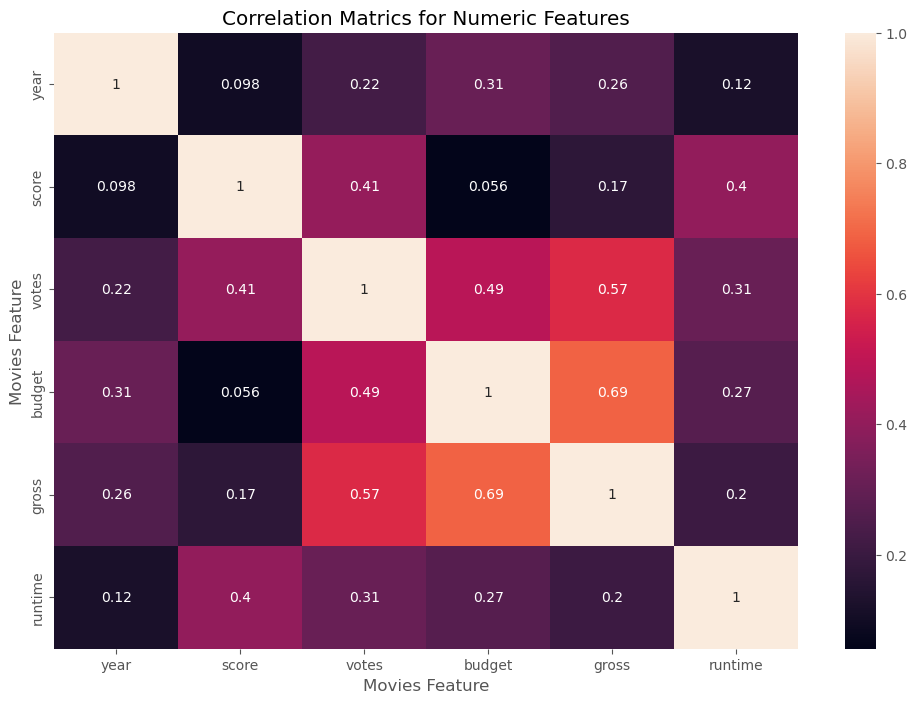

In [82]:
# High correlation between budget VS gross

correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrics for Numeric Features')
plt.xlabel('Movies Feature')
plt.ylabel('Movies Feature')

plt.show;


In [ ]:
# END OF THE PROJECT!

# Bonus: For Study Purpose

In [ ]:
# This is only for study purposes because the data is categorical type, not actually suitable for correlation analysis
# To get accurate correlation analysis, 'numerical' or 'ordinal' data types are most suitable
# Example dataset:
    # Average BMI 
    # Average Income 
    # Number of sales company 
    # Survey responses
    # Movie rating

In [84]:
# Inspect on Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0


In [86]:
# Change all columns into numeric types

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
7480,6194,4,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0
6653,2969,5,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0
6043,5502,5,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,3372,3,6,2006,2392,6.3,12000.0,1563,2397,788,55,1000000,0,396,77.0
7667,5394,-1,10,2020,391,5.7,7.0,2165,3344,2463,44,0,0,1787,102.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,-2147483648,2253,194.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,-2147483648,1606,181.0


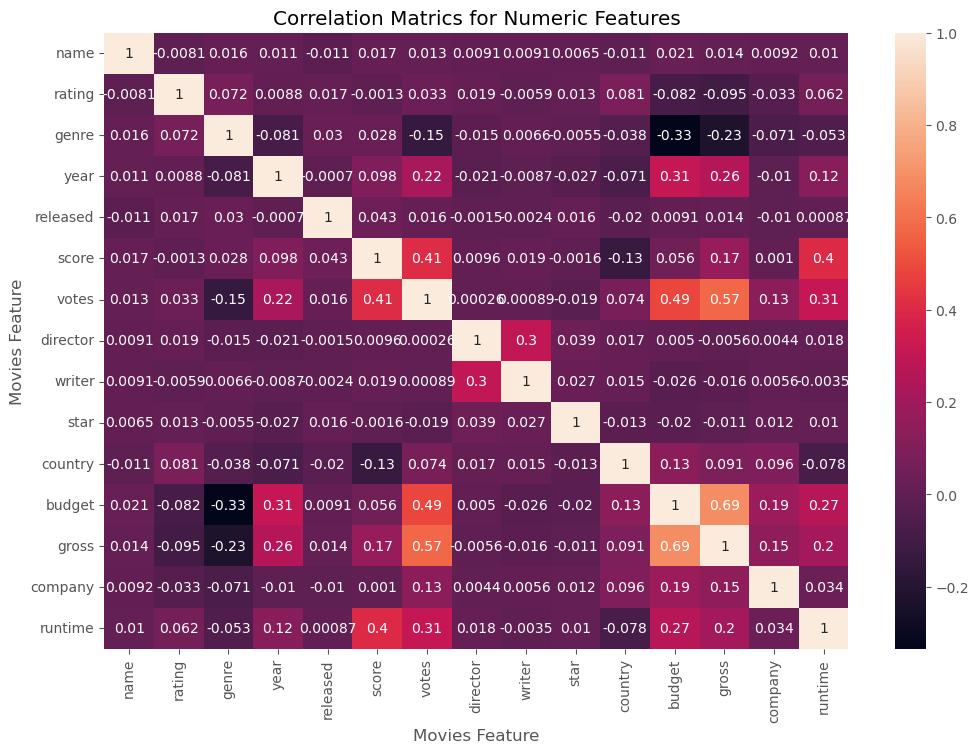

In [90]:
# Visualize the correlation matrics by numeric features

correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrics for Numeric Features')
plt.xlabel('Movies Feature')
plt.ylabel('Movies Feature')

plt.show;


In [94]:
df_numerized.corr(numeric_only=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.014154,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174


In [98]:
# Unstack correlation table into a list

correlation_mat = df_numerized.corr(numeric_only=True)

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.013895
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095355
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [100]:
# Sorted by pair correlation each columns 

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.334021
genre     budget     -0.334021
gross     genre      -0.229534
genre     gross      -0.229534
votes     genre      -0.145307
genre     votes      -0.145307
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.095355
gross     rating     -0.095355
budget    rating     -0.081939
rating    budget     -0.081939
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
genre     company    -0.071067
company   genre      -0.071067
country   year       -0.070938
year      country    -0.070938
genre     runtime    -0.052711
runtime   genre      -0.052711
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
budget    writer     -0.025911
writer    budget     -0.025911
director  year       -0.020795
year      director   -0.020795
country 

In [102]:
# Filter high correlations by 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.573889
gross     votes       0.573889
budget    gross       0.687124
gross     budget      0.687124
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Conclusion: Votes and budget have the highest correlation to gross earning